In [7]:
import pandas as pd
import numpy as np 

### load the data

In [8]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_target = pd.read_csv('sample_submission.csv')

In [9]:
df_train.isna().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
df_test.isna().sum()


id             0
keyword       26
location    1105
text           0
dtype: int64

In [11]:
df_target.isna().sum()


id        0
target    0
dtype: int64

In [12]:
df_train.keyword = df_train.keyword.fillna(df_train.keyword.mode()[0])
df_test.keyword = df_test.keyword.fillna(df_test.keyword.mode()[0])
df_train = df_train.dropna()
df_test = df_test.dropna()

In [13]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


###  Text Clean 

In [14]:
# Libraries and packages for text (pre-)processing 
import string
import re
import nltk

In [15]:
df_train["clean_text"] = df_train["text"].apply(lambda x: x.lower())

In [16]:
!pip install contractions


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [17]:
import contractions

In [18]:
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: contractions.fix(x))

In [19]:
df_train["clean_text"]

0       @bbcmtd wholesale markets ablaze http://t.co/l...
1       we always try to bring the heavy. #metal #rt h...
2       #africanbaze: breaking news:nigeria flag set a...
3                      crying out for more! set me ablaze
4       on plus side look at the sky last night it was...
                              ...                        
5075    on the bright side i wrecked http://t.co/uea0t...
5076    @widda16 ... he is gone. you can relax. i thou...
5077    three days off from work and they have pretty ...
5078    #fx #forex #trading cramer: iger's 3 words tha...
5079    @engineshed great atmosphere at the british li...
Name: clean_text, Length: 5080, dtype: object

In [20]:
print(df_train["text"][67])
print(df_train["clean_text"][67])

320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/M4JDZMGJoW | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/n0uhAsfkBv
320 [ir] icemoon [aftershock] | http://t.co/m4jdzmgjow | @djicemoon | #dubstep #trapmusic #dnb #edm #dance #icesû_ http://t.co/n0uhasfkbv


In [21]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)



def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)


def remove_non_ascii(text):
    """
        Remove non-ASCII characters 
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable]) 

def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [22]:
df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_URL(x))

df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_html(x))

df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_non_ascii(x))

df_train["clean_text"] = df_train["clean_text"].apply(lambda x: remove_punct(x))

###  Text Preprocessing 

In [23]:
%time
# Tokenizing the tweet base texts.
from nltk.tokenize import word_tokenize

df_train['tokenized'] = df_train['clean_text'].apply(word_tokenize)
df_train.head()

CPU times: user 7 µs, sys: 3 µs, total: 10 µs
Wall time: 17.6 µs


,id,keyword,location,text,target,clean_text,tokenized
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze,"[bbcmtd, wholesale, markets, ablaze]"
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt,"[we, always, try, to, bring, the, heavy, metal..."
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, breaking, newsnigeria, flag, set..."
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze,"[crying, out, for, more, set, me, ablaze]"
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,"[on, plus, side, look, at, the, sky, last, nig..."


In [24]:
# Removing stopwords.
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df_train['stopwords_removed'] = df_train['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df_train.head()

[nltk_data] Downloading package stopwords to /home/aboud/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target,clean_text,tokenized,stopwords_removed
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze,"[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesale, markets, ablaze]"
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt,"[we, always, try, to, bring, the, heavy, metal...","[always, try, bring, heavy, metal, rt]"
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, breaking, newsnigeria, flag, set..."
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze,"[crying, out, for, more, set, me, ablaze]","[crying, set, ablaze]"
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,"[on, plus, side, look, at, the, sky, last, nig...","[plus, side, look, sky, last, night, ablaze]"


In [25]:
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer


def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

def lancaster_stemmer(text):
    """
        Stem words in list of tokenized words with LancasterStemmer
    """
    stemmer = nltk.LancasterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

def snowball_stemmer(text):
    """
        Stem words in list of tokenized words with SnowballStemmer
    """
    stemmer = nltk.SnowballStemmer("english")
    stems = [stemmer.stem(i) for i in text]
    return stems




In [26]:
%time 

df_train['porter_stemmer'] = df_train['stopwords_removed'].apply(lambda x: porter_stemmer(x))

df_train['lancaster_stemmer'] = df_train['stopwords_removed'].apply(lambda x: lancaster_stemmer(x))

df_train['snowball_stemmer'] = df_train['stopwords_removed'].apply(lambda x: snowball_stemmer(x))


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 13.4 µs


In [27]:
# uncomments if u havent download it yet
# nltk.download('brown')

from nltk.corpus import wordnet
from nltk.corpus import brown

wordnet_map = {"N":wordnet.NOUN, 
               "V":wordnet.VERB, 
               "J":wordnet.ADJ, 
               "R":wordnet.ADV
              }
    
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

def pos_tag_wordnet(text, pos_tag_type="pos_tag"):
    """
        Create pos_tag with wordnet format
    """
    pos_tagged_text = t2.tag(text)
    
    # map the pos tagging output with wordnet output 
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text ]
    return pos_tagged_text

In [28]:
%time 

df_train['combined_postag_wnet'] = df_train['stopwords_removed'].apply(lambda x: pos_tag_wordnet(x))

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 11.9 µs


In [29]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [30]:
# Test without POS Tagging
lemmatizer = WordNetLemmatizer()

df_train['lemmatize_word_wo_pos'] = df_train['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df_train['lemmatize_word_wo_pos'] = df_train['lemmatize_word_wo_pos'].apply(lambda x: [word for word in x if word not in stop])
df_train.head()

,id,keyword,location,text,target,clean_text,tokenized,stopwords_removed,porter_stemmer,lancaster_stemmer,snowball_stemmer,combined_postag_wnet,lemmatize_word_wo_pos
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze,"[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesal, market, ablaz]","[bbcmtd, wholes, market, ablaz]","[bbcmtd, wholesal, market, ablaz]","[(bbcmtd, n), (wholesale, a), (markets, n), (a...","[bbcmtd, wholesale, market, ablaze]"
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt,"[we, always, try, to, bring, the, heavy, metal...","[always, try, bring, heavy, metal, rt]","[alway, tri, bring, heavi, metal, rt]","[alway, try, bring, heavy, met, rt]","[alway, tri, bring, heavi, metal, rt]","[(always, r), (try, v), (bring, v), (heavy, a)...","[always, try, bring, heavy, metal, rt]"
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaz, break, newsnigeria, flag, set, ab...","[africanbaz, break, newsniger, flag, set, abla...","[africanbaz, break, newsnigeria, flag, set, ab...","[(africanbaze, n), (breaking, v), (newsnigeria...","[africanbaze, breaking, newsnigeria, flag, set..."
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze,"[crying, out, for, more, set, me, ablaze]","[crying, set, ablaze]","[cri, set, ablaz]","[cry, set, ablaz]","[cri, set, ablaz]","[(crying, n), (set, v), (ablaze, r)]","[cry, set, ablaze]"
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,"[on, plus, side, look, at, the, sky, last, nig...","[plus, side, look, sky, last, night, ablaze]","[plu, side, look, sky, last, night, ablaz]","[plu, sid, look, sky, last, night, ablaz]","[plus, side, look, sky, last, night, ablaz]","[(plus, n), (side, n), (look, n), (sky, n), (l...","[plus, side, look, sky, last, night, ablaze]"


In [31]:
%time 

# Test with POS Tagging
lemmatizer = WordNetLemmatizer()

df_train['lemmatize_word_w_pos'] = df_train['combined_postag_wnet'].apply(lambda x: lemmatize_word(x))
df_train['lemmatize_word_w_pos'] = df_train['lemmatize_word_w_pos'].apply(lambda x: [word for word in x if word not in stop]) # double check to remove stop words
df_train['lemmatize_text'] = [' '.join(map(str, l)) for l in df_train['lemmatize_word_w_pos']] # join back to text

df_train.head()

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 16.7 µs


,id,keyword,location,text,target,clean_text,tokenized,stopwords_removed,porter_stemmer,lancaster_stemmer,snowball_stemmer,combined_postag_wnet,lemmatize_word_wo_pos,lemmatize_word_w_pos,lemmatize_text
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze,"[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesal, market, ablaz]","[bbcmtd, wholes, market, ablaz]","[bbcmtd, wholesal, market, ablaz]","[(bbcmtd, n), (wholesale, a), (markets, n), (a...","[bbcmtd, wholesale, market, ablaze]","[bbcmtd, wholesale, market, ablaze]",bbcmtd wholesale market ablaze
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt,"[we, always, try, to, bring, the, heavy, metal...","[always, try, bring, heavy, metal, rt]","[alway, tri, bring, heavi, metal, rt]","[alway, try, bring, heavy, met, rt]","[alway, tri, bring, heavi, metal, rt]","[(always, r), (try, v), (bring, v), (heavy, a)...","[always, try, bring, heavy, metal, rt]","[always, try, bring, heavy, metal, rt]",always try bring heavy metal rt
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaz, break, newsnigeria, flag, set, ab...","[africanbaz, break, newsniger, flag, set, abla...","[africanbaz, break, newsnigeria, flag, set, ab...","[(africanbaze, n), (breaking, v), (newsnigeria...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, break, newsnigeria, flag, set, a...",africanbaze break newsnigeria flag set ablaze aba
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze,"[crying, out, for, more, set, me, ablaze]","[crying, set, ablaze]","[cri, set, ablaz]","[cry, set, ablaz]","[cri, set, ablaz]","[(crying, n), (set, v), (ablaze, r)]","[cry, set, ablaze]","[cry, set, ablaze]",cry set ablaze
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,"[on, plus, side, look, at, the, sky, last, nig...","[plus, side, look, sky, last, night, ablaze]","[plu, side, look, sky, last, night, ablaz]","[plu, sid, look, sky, last, night, ablaz]","[plus, side, look, sky, last, night, ablaz]","[(plus, n), (side, n), (look, n), (sky, n), (l...","[plus, side, look, sky, last, night, ablaze]","[plus, side, look, sky, last, night, ablaze]",plus side look sky last night ablaze


In [32]:


print(df_train["text"][31])
print(df_train["combined_postag_wnet"][31])
print(df_train["lemmatize_word_wo_pos"][31])
print(df_train["lemmatize_word_w_pos"][31])



Accident center lane blocked in #SantaClara on US-101 NB before Great America Pkwy #BayArea #Traffic http://t.co/pmlOhZuRWR
[('accident', 'n'), ('center', 'n'), ('lane', 'n'), ('blocked', 'v'), ('santaclara', 'n'), ('us101', 'n'), ('nb', 'n'), ('great', 'a'), ('america', 'n'), ('pkwy', 'n'), ('bayarea', 'n'), ('traffic', 'n')]
['accident', 'center', 'lane', 'blocked', 'santaclara', 'us101', 'nb', 'great', 'america', 'pkwy', 'bayarea', 'traffic']
['accident', 'center', 'lane', 'block', 'santaclara', 'us101', 'nb', 'great', 'america', 'pkwy', 'bayarea', 'traffic']


In [33]:
df_train

,id,keyword,location,text,target,clean_text,tokenized,stopwords_removed,porter_stemmer,lancaster_stemmer,snowball_stemmer,combined_postag_wnet,lemmatize_word_wo_pos,lemmatize_word_w_pos,lemmatize_text
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze,"[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesal, market, ablaz]","[bbcmtd, wholes, market, ablaz]","[bbcmtd, wholesal, market, ablaz]","[(bbcmtd, n), (wholesale, a), (markets, n), (a...","[bbcmtd, wholesale, market, ablaze]","[bbcmtd, wholesale, market, ablaze]",bbcmtd wholesale market ablaze
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt,"[we, always, try, to, bring, the, heavy, metal...","[always, try, bring, heavy, metal, rt]","[alway, tri, bring, heavi, metal, rt]","[alway, try, bring, heavy, met, rt]","[alway, tri, bring, heavi, metal, rt]","[(always, r), (try, v), (bring, v), (heavy, a)...","[always, try, bring, heavy, metal, rt]","[always, try, bring, heavy, metal, rt]",always try bring heavy metal rt
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaz, break, newsnigeria, flag, set, ab...","[africanbaz, break, newsniger, flag, set, abla...","[africanbaz, break, newsnigeria, flag, set, ab...","[(africanbaze, n), (breaking, v), (newsnigeria...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, break, newsnigeria, flag, set, a...",africanbaze break newsnigeria flag set ablaze aba
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze,"[crying, out, for, more, set, me, ablaze]","[crying, set, ablaze]","[cri, set, ablaz]","[cry, set, ablaz]","[cri, set, ablaz]","[(crying, n), (set, v), (ablaze, r)]","[cry, set, ablaze]","[cry, set, ablaze]",cry set ablaze
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,"[on, plus, side, look, at, the, sky, last, nig...","[plus, side, look, sky, last, night, ablaze]","[plu, side, look, sky, last, night, ablaz]","[plu, sid, look, sky, last, night, ablaz]","[plus, side, look, sky, last, night, ablaz]","[(plus, n), (side, n), (look, n), (sky, n), (l...","[plus, side, look, sky, last, night, ablaze]","[plus, side, look, sky, last, night, ablaze]",plus side look sky last night ablaze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,on the bright side i wrecked,"[on, the, bright, side, i, wrecked]","[bright, side, wrecked]","[bright, side, wreck]","[bright, sid, wreck]","[bright, side, wreck]","[(bright, a), (side, n), (wrecked, v)]","[bright, side, wrecked]","[bright, side, wreck]",bright side wreck
5076,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,widda16 he is gone you can relax i thought th...,"[widda16, he, is, gone, you, can, relax, i, th...","[widda16, gone, relax, thought, wife, wrecked,...","[widda16, gone, relax, thought, wife, wreck, c...","[widda16, gon, relax, thought, wif, wreck, cak...","[widda16, gone, relax, thought, wife, wreck, c...","[(widda16, n), (gone, v), (relax, n), (thought...","[widda16, gone, relax, thought, wife, wrecked,...","[widda16, go, relax, think, wife, wreck, cake,...",widda16 go relax think wife wreck cake goner m...
5077,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,three days off from work and they have pretty ...,"[three, days, off, from, work, and, they, have...","[three, days, work, pretty, much, wrecked, hah...","[three, day, work, pretti, much, wreck, hahaha...","[three, day, work, pretty, much, wreck, hahah,...","[three, d

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

def cv(data, ngram = 1, MAX_NB_WORDS = 7500):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = count_vectorizer.fit_transform(data).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer

In [77]:

train_df_em_2gram, vc_2gram = cv(train_df_corpus, 2)
train_df_em_3gram, vc_3gram = cv(train_df_corpus, 3)

print(len(train_df_corpus))
print(train_df_em_1gram.shape)
print(train_df_em_2gram.shape)
print(train_df_em_3gram.shape)


count vectorize with 7500 features
count vectorize with 7500 features
count vectorize with 7500 features
5080
(5080, 7500)
(5080, 7500)
(5080, 7500)


In [83]:
y = df_train["target"]

In [79]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# Sample data
data = [('aboud', 'N'), ('like', 'adj'), ('footbool', 'N')]

# Tokenize the data and create encodings
words, pos_tags = zip(*data)
vectorizer = CountVectorizer()
vectorizer.fit(words)
vocab = vectorizer.vocabulary_
word_encodings = [vocab[word] for word in words]
le = LabelEncoder()
le.fit(pos_tags)
pos_encodings = le.transform(pos_tags)
X = list(zip(word_encodings, pos_encodings))
y = [0, 1, 0]  # Assuming you have a target variable

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
new_data = [('aboud', 'N'), ('like', 'adj')]
new_words, new_pos_tags = zip(*new_data)
new_word_encodings = [vocab[word] for word in new_words]
new_pos_encodings = le.transform(new_pos_tags)
new_X = list(zip(new_word_encodings, new_pos_encodings))
predictions = model.predict(new_X)
print(predictions)

[0 1]


[0, 1, 0]

count vectorize with 7500 features


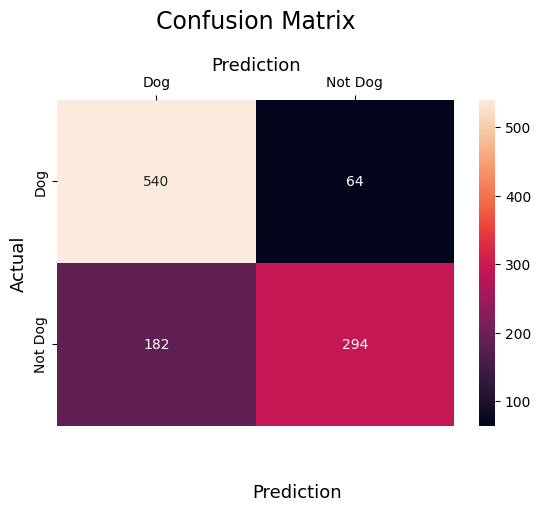

In [109]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["lemmatize_text"].tolist()
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

count vectorize with 7500 features


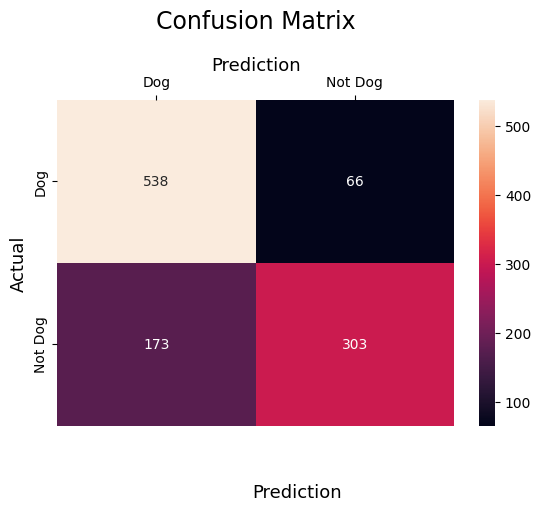

In [108]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["porter_stemmer"].apply(lambda x : " ".join(x))
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

count vectorize with 7500 features


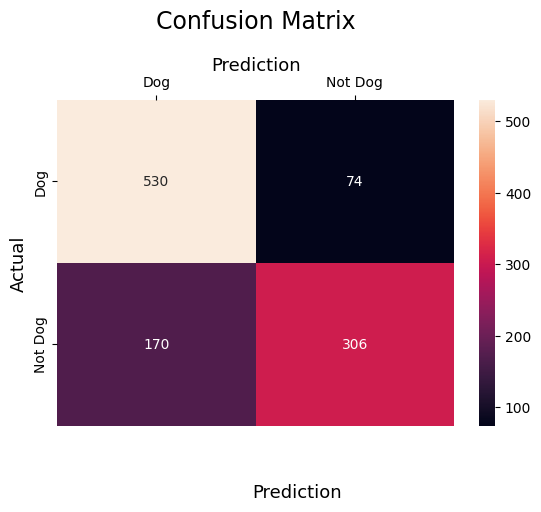

In [111]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["lancaster_stemmer"].apply(lambda x : " ".join(x))
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

count vectorize with 7500 features


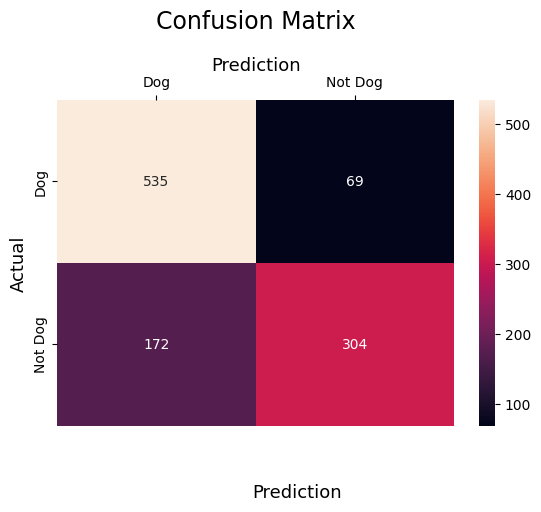

In [112]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt 

# implement into the whole dataset
train_df_corpus = df_train["snowball_stemmer"].apply(lambda x : " ".join(x))
train_df_em_1gram, vc_1gram = cv(train_df_corpus, 1)


model = LogisticRegression()
model.fit(train_df_em_1gram[:4000], y[:4000])
y_pred = model.predict(train_df_em_1gram[4000:])


cm = confusion_matrix(y[4000:],y_pred)

sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Dog','Not Dog'], yticklabels=['Dog','Not Dog']) 
plt.ylabel('Actual', fontsize=13) 
plt.title('Confusion Matrix', fontsize=17, pad=20) 
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13) 
plt.gca().xaxis.tick_top() 
plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()

In [105]:
df_train

,id,keyword,location,text,target,clean_text,tokenized,stopwords_removed,porter_stemmer,lancaster_stemmer,snowball_stemmer,combined_postag_wnet,lemmatize_word_wo_pos,lemmatize_word_w_pos,lemmatize_text
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,bbcmtd wholesale markets ablaze,"[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesale, markets, ablaze]","[bbcmtd, wholesal, market, ablaz]","[bbcmtd, wholes, market, ablaz]","[bbcmtd, wholesal, market, ablaz]","[(bbcmtd, n), (wholesale, a), (markets, n), (a...","[bbcmtd, wholesale, market, ablaze]","[bbcmtd, wholesale, market, ablaze]",bbcmtd wholesale market ablaze
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,we always try to bring the heavy metal rt,"[we, always, try, to, bring, the, heavy, metal...","[always, try, bring, heavy, metal, rt]","[alway, tri, bring, heavi, metal, rt]","[alway, try, bring, heavy, met, rt]","[alway, tri, bring, heavi, metal, rt]","[(always, r), (try, v), (bring, v), (heavy, a)...","[always, try, bring, heavy, metal, rt]","[always, try, bring, heavy, metal, rt]",always try bring heavy metal rt
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,africanbaze breaking newsnigeria flag set abla...,"[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaz, break, newsnigeria, flag, set, ab...","[africanbaz, break, newsniger, flag, set, abla...","[africanbaz, break, newsnigeria, flag, set, ab...","[(africanbaze, n), (breaking, v), (newsnigeria...","[africanbaze, breaking, newsnigeria, flag, set...","[africanbaze, break, newsnigeria, flag, set, a...",africanbaze break newsnigeria flag set ablaze aba
3,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,crying out for more set me ablaze,"[crying, out, for, more, set, me, ablaze]","[crying, set, ablaze]","[cri, set, ablaz]","[cry, set, ablaz]","[cri, set, ablaz]","[(crying, n), (set, v), (ablaze, r)]","[cry, set, ablaze]","[cry, set, ablaze]",cry set ablaze
4,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,on plus side look at the sky last night it was...,"[on, plus, side, look, at, the, sky, last, nig...","[plus, side, look, sky, last, night, ablaze]","[plu, side, look, sky, last, night, ablaz]","[plu, sid, look, sky, last, night, ablaz]","[plus, side, look, sky, last, night, ablaz]","[(plus, n), (side, n), (look, n), (sky, n), (l...","[plus, side, look, sky, last, night, ablaze]","[plus, side, look, sky, last, night, ablaze]",plus side look sky last night ablaze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,10826,wrecked,TN,On the bright side I wrecked http://t.co/uEa0t...,0,on the bright side i wrecked,"[on, the, bright, side, i, wrecked]","[bright, side, wrecked]","[bright, side, wreck]","[bright, sid, wreck]","[bright, side, wreck]","[(bright, a), (side, n), (wrecked, v)]","[bright, side, wrecked]","[bright, side, wreck]",bright side wreck
5076,10829,wrecked,#NewcastleuponTyne #UK,@widda16 ... He's gone. You can relax. I thoug...,0,widda16 he is gone you can relax i thought th...,"[widda16, he, is, gone, you, can, relax, i, th...","[widda16, gone, relax, thought, wife, wrecked,...","[widda16, gone, relax, thought, wife, wreck, c...","[widda16, gon, relax, thought, wif, wreck, cak...","[widda16, gone, relax, thought, wife, wreck, c...","[(widda16, n), (gone, v), (relax, n), (thought...","[widda16, gone, relax, thought, wife, wrecked,...","[widda16, go, relax, think, wife, wreck, cake,...",widda16 go relax think wife wreck cake goner m...
5077,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,three days off from work and they have pretty ...,"[three, days, off, from, work, and, they, have...","[three, days, work, pretty, much, wrecked, hah...","[three, day, work, pretti, much, wreck, hahaha...","[three, day, work, pretty, much, wreck, hahah,...","[three, d

In [137]:
data = df_train["combined_postag_wnet"]

# Create a vocabulary of tokens and their corresponding indices
token_to_idx = {}
idx_to_token = {}
pos_to_idx = {}
idx_to_pos = {}

# Iterate through the data and build the vocabularies
for example in data:
    for token, pos in example:
        if token not in token_to_idx:
            token_idx = len(token_to_idx)
            token_to_idx[token] = token_idx
            idx_to_token[token_idx] = token
        if pos not in pos_to_idx:
            pos_idx = len(pos_to_idx)
            pos_to_idx[pos] = pos_idx
            idx_to_pos[pos_idx] = pos

# Encode the data
X_token = [[token_to_idx[token] for token, _ in example] for example in data]
X_pos = [[pos_to_idx[pos] for _, pos in example] for example in data]

In [157]:
data = df_train["combined_postag_wnet"]
words = []
pos_tags = []

In [158]:
for i in list(zip(*data))[0]:
    words.append(i[0]) , pos_tags.append(i[1])

In [161]:
vocab

{'bbcmtd': 293,
 'always': 153,
 'africanbaze': 114,
 'crying': 631,
 'plus': 2048,
 'phdsquares': 2012,
 'inec': 1305,
 'ablaze': 86,
 'check': 502,
 'awesome': 255,
 'west': 2889,
 'first': 981,
 'deputies': 724,
 'man': 1636,
 'santa': 2282,
 'police': 2053,
 'noches': 1872,
 'kurds': 1487,
 'truck': 2727,
 'set': 2349,
 'sky': 2401,
 'progressive': 2085,
 'rene': 2183,
 'navista7': 1821,
 'nowplaying': 1884,
 'nxwestmidlands': 1897,
 'kids': 1452,
 'accident': 93,
 'personalinjury': 2003,
 'stlouis': 2502,
 'reported': 2186,
 'bigrigradio': 332,
 'i77': 1266,
 'traffic': 2698,
 'pastor': 1981,
 'horrible': 1246,
 'truckcrash': 2728,
 'fyi': 1054,
 'rt': 2250,
 'aashiqui': 80,
 'suffield': 2530,
 'breaking': 400,
 'flowri': 1001,
 'norwaymfa': 1878,
 'still': 2501,
 'aftershockdelo': 116,
 '320': 48,
 'victory': 2819,
 'nobody': 1871,
 'harder': 1170,
 'guess': 1141,
 'aftershock': 115,
 'kjfordays': 1468,
 'wisdomwed': 2918,
 '15': 21,
 'sometimes': 2437,
 'thing': 2634,
 'praise':

In [159]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# Sample data
data = df_train["combined_postag_wnet"]
# Tokenize the data and create encodings
vectorizer = CountVectorizer()
vectorizer.fit(words)
vocab = vectorizer.vocabulary_
word_encodings = [vocab[word] for word in words]
le = LabelEncoder()
le.fit(pos_tags)
pos_encodings = le.transform(pos_tags)
X = list(zip(word_encodings, pos_encodings))
y = df_train["target"] # Assuming you have a target variable

# Train a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
new_data = [('aboud', 'N'), ('like', 'adj')]
new_words, new_pos_tags = zip(*new_data)
new_word_encodings = [vocab[word] for word in new_words]
new_pos_encodings = le.transform(new_pos_tags)
new_X = list(zip(new_word_encodings, new_pos_encodings))
predictions = model.predict(new_X)
print(predictions)


KeyError: '9'

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Embedding, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate

max_seq_len = max(len(example) for example in X_token)

# Pad the sequences to the max length
X_token = tf.keras.preprocessing.sequence.pad_sequences(X_token, maxlen=max_seq_len, padding='post')
X_pos = tf.keras.preprocessing.sequence.pad_sequences(X_pos, maxlen=max_seq_len, padding='post')

# Assuming you have labels in another column
y = df_train["target"].values

# Define the input layers
token_input = Input(shape=(max_seq_len,), name='token_input')
pos_input = Input(shape=(max_seq_len,), name='pos_input')

# Define the embedding layers
token_embedding = Embedding(len(token_to_idx), 64, input_length=max_seq_len, name='token_embedding')(token_input)
pos_embedding = Embedding(len(pos_to_idx), 32, input_length=max_seq_len, name='pos_embedding')(pos_input)

# Concatenate the embeddings
combined_input = Concatenate(name='combined_input')([token_embedding, pos_embedding])

# Define the dense layers
x = Dense(128, activation='relu', name='dense1')(combined_input)
x = Dense(64, activation='relu', name='dense2')(x)
output = Dense(24, activation='sigmoid', name='output')(x)

# Create the model
model = Model(inputs=[token_input, pos_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_token, X_pos], y, epochs=100, batch_size=32, verbose=0)

# Make predictions
new_data_token = [[token_to_idx[token] for token, _ in example] for example in new_data]
new_data_pos = [[pos_to_idx[pos] for _, pos in example] for example in new_data]

new_predictions = model.predict([new_data_token, new_data_pos])
print(new_predictions)